# Introduction
I had trouble downloading data with EIAdata. With a valid key it returned an error: <br>
PETA103600001M <- getEIA(key=key, ID=str.symbol.raw )<br>
failed to load HTTP resource<br>
Error: 1: failed to load HTTP resource

This notebook exists to troubleshoot the problem

## Production library


In [1]:
library(EIAdata)
require(httr)

Loading required package: XML

Loading required package: xts

Loading required package: zoo


Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric


Loading required package: httr



## Recommended implementation

In [2]:
str.symbol.raw = "PET.A103600001.M"
key <- "7a2672468131c5a95dffc487d741edf6"
ETA103600001M <- getEIA(key=key, ID=str.symbol.raw )

failed to load HTTP resource


ERROR: Error: 1: failed to load HTTP resource



## Work around

### Set user agent

In [3]:
UA <- "Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2227.0 Safari/537.36"

### Set the URL manually 
This works in my Chrome browser

In [10]:
my.url <- "https://api.eia.gov/series/?series_id=PET.A103600001.M&api_key=7a2672468131c5a95dffc487d741edf6&out=xml"

In [11]:
page <- GET(my.url, user_agent(UA))

Parse the data

In [12]:
doc <- XML::xmlParse(content(page, "text"))

In [13]:
df <- data.frame(
    date = sapply(doc["//data/row/date"], XML::xmlValue),
    value = sapply(doc["//data/row/value"], XML::xmlValue)
  )

In [15]:
tail(df)

,date,value
,<chr>,<chr>
462,198306,52517.2
463,198305,52021.3
464,198304,49093.7
465,198303,54111.7
466,198302,48906.1
467,198301,46218.3


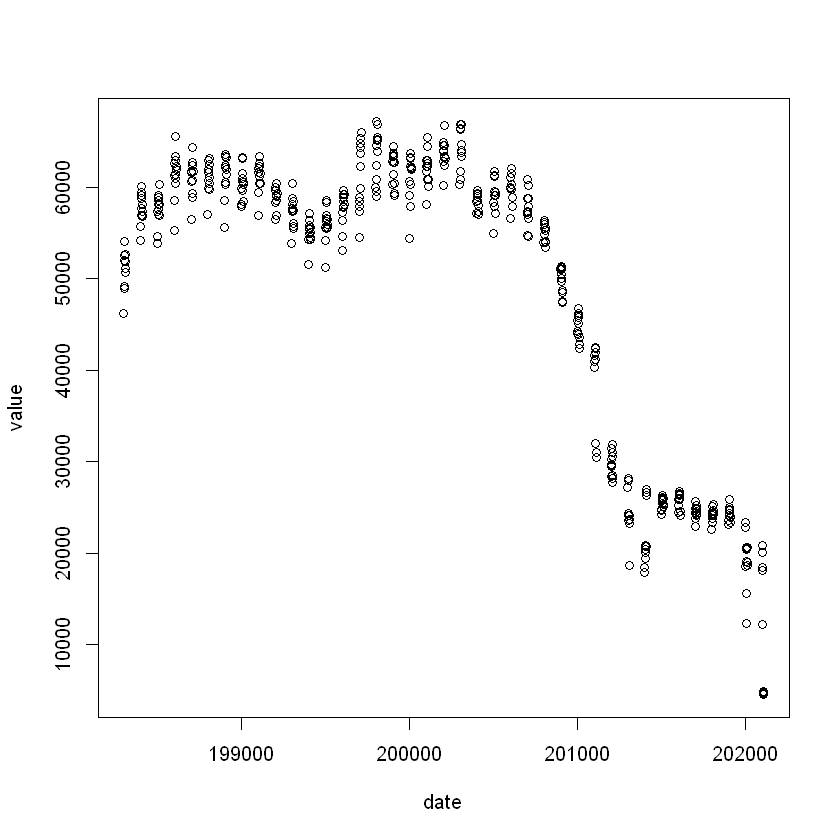

In [14]:
plot(df)